# Optimization algorithms for linear regression

## Task 1: Stochastic Gradient Descent

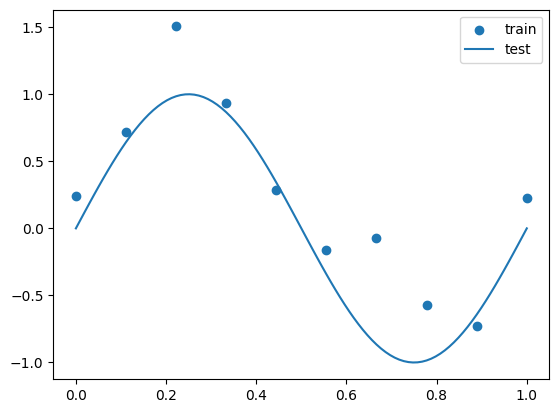

In [1]:
import torch
import numpy as np
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
#Set torch device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Seeds
np.random.seed(0)

#Synthetic Dataset

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

def generate_data(n_samples):
    x = np.linspace(0, 1, n_samples)
    np.random.shuffle(x)
    y = sinusoidal(x) + np.random.normal(0, np.sqrt(0.3), n_samples)
    return x, y

n_train_samples = 10
n_test_samples = 100

x_train, y_train = generate_data(n_train_samples)

x_test = np.linspace(0, 1, n_test_samples)
y_test = sinusoidal(x_test)

plt.scatter(x_train, y_train, label='train')
plt.plot(x_test, y_test, label='test')
plt.legend()
plt.show()

In [2]:
# Model
polynomial_order = 9
w = torch.randn(polynomial_order + 1, dtype=torch.float64, device=device)
X = torch.tensor(x_train[:, None] ** [i for i in range(polynomial_order + 1)], device=device)
y = torch.tensor(y_train, device=device)

X_test = torch.tensor(x_test[:, None] ** [i for i in range(polynomial_order + 1)], device=device)
y_test = torch.tensor(y_test, device=device)

### SGD Equations for squared loss
$ Squared\,Loss\,Function\,:\,L(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \\$ 
$ Squared\,Loss\,Function\,for\,multivariate\,linear\,regression\,:\,L(\omega) = || y - X\omega ||_2^2 \quad where\,X\omega=\hat{y} + \lambda ||\omega||_2^2\\$  
$ Gradient\,of\,Squared\,Loss : \frac{\partial L(\omega)}{\partial \omega} = \frac{\partial}{\partial \omega} || y - X\omega ||_2^2 = -2X^T(y - X\omega) + 2\lambda \omega\\$
$ Weights\,update\,rule\,for\,SGD : \omega_{K+1} = \omega_{K} - \eta \frac{\partial L(\omega)}{\partial \omega} = \omega + 2\eta X^T(y - X\omega)\quad where\,\eta=learning\,rate\\$

In [3]:
# SGD from scratch
n_epochs = 10000
learning_rate = 0.01
train_losses = []
test_losses = []
l = 2 ** -25

batch_size = 1 #As it is asked to assume whenever SGD is used in this course
n_batches = n_train_samples // batch_size

for epoch in tqdm.trange(n_epochs):
    for i in range(n_batches):
        X_batch = X[i * batch_size:(i + 1) * batch_size]
        y_batch = y[i * batch_size:(i + 1) * batch_size]
        y_pred = X_batch @ w
        squared_loss = torch.mean((y_pred - y_batch) ** 2)
        loss = squared_loss + l * torch.norm(w) ** 2 #L2 regularization
        gradient_of_loss = -2 * X_batch.t() @ (y_batch - y_pred)  + 2 * l * w
        w = w - learning_rate * gradient_of_loss
    test_loss = torch.mean((X_test @ w - y_test) ** 2)
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())




100%|██████████| 10000/10000 [00:20<00:00, 490.20it/s]


Hyper parameters used are n_epochs, learning_rate, l (lambda), and batch_size.

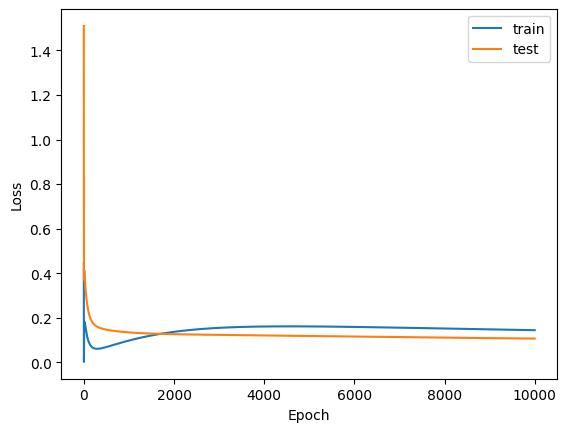

In [4]:
# Loss vs epoch 
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

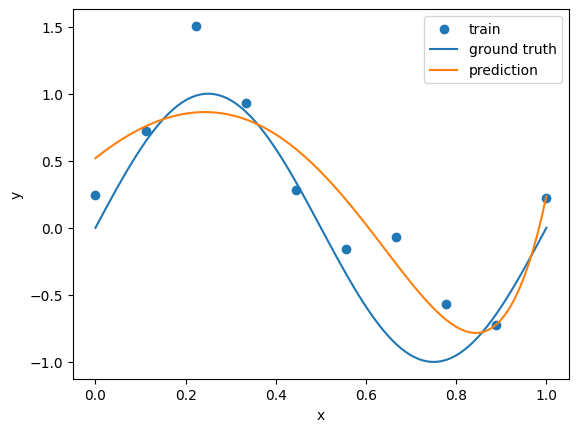

In [5]:
# Final Polynomial equation
plt.scatter(x_train, y_train, label='train')
plt.plot(x_test, y_test.cpu().detach().numpy(), label='ground truth')
plt.plot(x_test, (X_test @ w).cpu().detach().numpy(), label='prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Task 2: Momentum

### Momentum Algorithm equations
$ Momentum\,update\,rule : v_{K+1} = \beta v_{K} + \frac{\partial L(\omega)}{\partial \omega} \quad where\,v_K\,is\,the\,velocity\,at\,time\,K\\$
$ Weights\,update\,rule\,for\,Momentum : \omega_{K+1} = \omega_{K} - \eta v_{K+1}\\$

In [6]:
#Momentum algorithm from scrath
w = torch.randn(polynomial_order + 1, dtype=torch.float64, device=device) # Reinitialize weights
n_epochs = 10000
learning_rate = 0.01
train_losses = []
test_losses = []
l = 2 ** -25

batch_size = 1 #As it is asked to assume whenever SGD is used in this course
n_batches = n_train_samples // batch_size

beta = 0.5
v = torch.zeros_like(w) #velocity

for epoch in tqdm.trange(n_epochs):
    for i in range(n_batches):
        X_batch = X[i * batch_size:(i + 1) * batch_size]
        y_batch = y[i * batch_size:(i + 1) * batch_size]
        y_pred = X_batch @ w
        squared_loss = torch.mean((y_pred - y_batch) ** 2)
        loss = squared_loss + l * torch.norm(w) ** 2 #L2 regularization
        gradient_of_loss = -2 * X_batch.t() @ (y_batch - y_pred)  + 2 * l * w
        v = beta * v + gradient_of_loss
        w = w - learning_rate * v
    test_loss = torch.mean((X_test @ w - y_test) ** 2)
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

100%|██████████| 10000/10000 [00:22<00:00, 445.60it/s]


Hyperparameters used are n_epochs, learning_rate, l (lambda), batch_size and beta. 

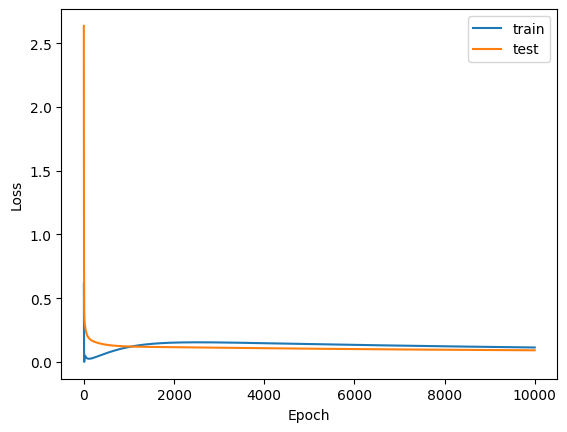

In [7]:
# Loss vs epoch 
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

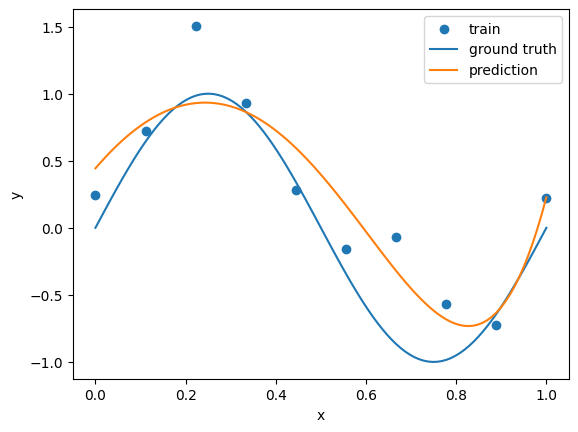

In [8]:
# Final Polynomial equation
plt.scatter(x_train, y_train, label='train')
plt.plot(x_test, y_test.cpu().detach().numpy(), label='ground truth')
plt.plot(x_test, (X_test @ w).cpu().detach().numpy(), label='prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Logisitc Regression

## Task1: Data Processing

In [18]:
import gzip
import random
data_filename = './data/train.gz'
n = 40428967 # Total number of records in the dataset according to Kaggle challenge
s = 100000 # Desired sample size

data = pd.read_csv(data_filename, compression='gzip', nrows=s)

In [19]:
for key in data.keys():
    print(key, data[key].value_counts().shape[0])


id 100000
click 2
hour 1
C1 6
banner_pos 5
site_id 893
site_domain 780
site_category 16
app_id 704
app_domain 55
app_category 19
device_id 7202
device_ip 40376
device_model 2473
device_type 4
device_conn_type 4
C14 420
C15 5
C16 6
C17 128
C18 4
C19 37
C20 137
C21 29


In [20]:
def preprocess_data(data):
    # Dropping irrelevant columns and the target
    # Dropping the columns that have a lot of unique values, to save on compute, also C20 has a lot of -1s so dropping it as it might negatively affect the model
    # Dropping hour due to data loading limitations, otherwise would be very useful
    data = data.drop(columns=['id', 'hour', 'site_id', 'site_domain', 'app_id', 'app_domain', 'device_id', 'device_ip', 'device_model', 'C14', 'C17', 'C20'])

    # one-hot encode the categorical features
    data = pd.get_dummies(data, columns=['site_category', 'app_category', 'device_type', 'device_conn_type', 'C1', 'banner_pos', 'C15', 'C16', 'C18', 'C19', 'C21'])
    return data

def train_test_split(data, test_size=0.2):
    n = len(data)
    n_test = int(n * test_size)
    n_train = n - n_test

    # Pick 20% of the test data with data[click] == 1
    test_data = data[data['click'] == 1].sample(int(n_test * 0.2))
    test_data = pd.concat([test_data, data[data['click'] == 0].sample(int(n_test * 0.8))])
    train_data = data.drop(test_data.index)

    test_X = test_data.drop(columns=['click'])
    test_y = test_data['click']

    train_X = train_data.drop(columns=['click'])
    train_y = train_data['click']

    return train_X, train_y, test_X, test_y

In [21]:
data = preprocess_data(data)

X_train, y_train, X_test, y_test = train_test_split(data, test_size=0.2)

X_train = torch.tensor(X_train.values, dtype=torch.float64, device=device)
y_train = torch.tensor(y_train.values, dtype=torch.float64, device=device)
X_test = torch.tensor(X_test.values, dtype=torch.float64, device=device)
y_test = torch.tensor(y_test.values, dtype=torch.float64, device=device)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

torch.Size([80000, 135]) torch.Size([80000]) torch.Size([20000, 135]) torch.Size([20000])


## Task 2: Logistic Regression

### Logistic Regression Equations
$ Logistic\,Loss\,Function\,:\,L(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n} y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\\$
$ Gradient\,of\,Logistic\,Loss : \frac{\partial L(\omega)}{\partial \omega} = \frac{1}{n}\sum_{i=1}^{n} (\hat{y}_i - y_i)X_i\\$
$ Weights\,update\,rule\,for\,Logistic\,Regression : \omega_{K+1} = \omega_{K} - \eta \frac{\partial L(\omega)}{\partial \omega} = \omega_{K} + \eta \frac{1}{n}\sum_{i=1}^{n} (\hat{y}_i - y_i)X_i\quad where\,\eta=learning\,rate\\$

In [22]:
X_train.shape

torch.Size([80000, 135])

In [23]:
# Stochastic Gradient Descent for Logistic Regression
w = torch.randn(X_train.shape[1], dtype=torch.float64, device=device)
n_epochs = 10
learning_rate = 0.01
train_losses = []
test_losses = []

batch_size = 1 #As it is asked to assume whenever SGD is used in this course
n_batches = X_train.shape[0] // batch_size

for epoch in tqdm.trange(n_epochs):
    epoch_loss = 0
    for i in range(n_batches):
        X_batch = X_train[i * batch_size:(i + 1) * batch_size]
        y_batch = y_train[i * batch_size:(i + 1) * batch_size]
        y_pred = torch.sigmoid(X_batch @ w) 
        loss = -torch.mean(y_batch * torch.log(y_pred) + (1 - y_batch) * torch.log(1 - y_pred)) 
        epoch_loss += loss.item()
        gradient_of_loss = (y_pred - y_batch) @ X_batch 
        w = w - learning_rate * gradient_of_loss
    print(f'Epoch {epoch}, Loss: {epoch_loss/ n_batches}')
    test_loss = -torch.mean(y_test * torch.log(torch.sigmoid(X_test @ w)) + (1 - y_test) * torch.log(1 - torch.sigmoid(X_test @ w)))
    train_losses.append(epoch_loss / n_batches)
    test_losses.append(test_loss.item())



 10%|█         | 1/10 [00:18<02:49, 18.82s/it]

Epoch 0, Loss: 0.43653712289565166


 20%|██        | 2/10 [00:35<02:20, 17.52s/it]

Epoch 1, Loss: 0.4230353264741486


 30%|███       | 3/10 [00:52<02:02, 17.48s/it]

Epoch 2, Loss: 0.42115466562177223


 40%|████      | 4/10 [01:11<01:48, 18.00s/it]

Epoch 3, Loss: 0.4203524556409556


 50%|█████     | 5/10 [01:26<01:24, 16.92s/it]

Epoch 4, Loss: 0.4199123612490868


 60%|██████    | 6/10 [01:41<01:05, 16.25s/it]

Epoch 5, Loss: 0.41962473057472305


 70%|███████   | 7/10 [01:57<00:48, 16.02s/it]

Epoch 6, Loss: 0.41941439651334167


 80%|████████  | 8/10 [02:15<00:33, 16.77s/it]

Epoch 7, Loss: 0.4192493264292421


 90%|█████████ | 9/10 [02:31<00:16, 16.48s/it]

Epoch 8, Loss: 0.41911391827289635


100%|██████████| 10/10 [02:46<00:00, 16.68s/it]

Epoch 9, Loss: 0.41899967263513443


In [24]:
def confusion_matrix(y_true, y_pred):
    TP = torch.sum(y_true * y_pred)
    FP = torch.sum((1 - y_true) * y_pred)
    TN = torch.sum((1 - y_true) * (1 - y_pred))
    FN = torch.sum(y_true * (1 - y_pred))
    return TP, FP, TN, FN

True Positives:332.0, False Positives:240.0, True Negatives:15760.0, False Negatives:3668.0


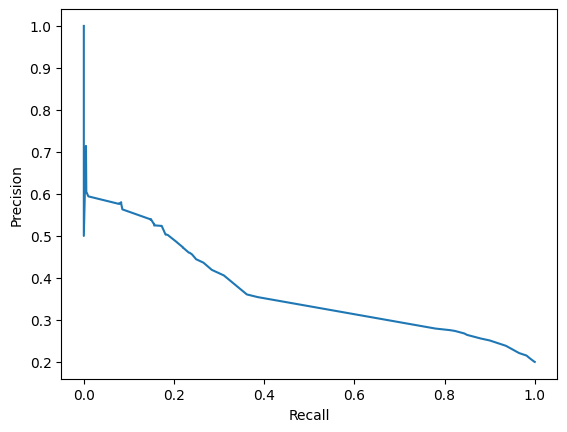

In [25]:
# Precision, Recall scores for threshold=0.5
y_pred = (torch.sigmoid(X_test @ w) > 0.5).double()
y_true = y_test
TP, FP, TN, FN = confusion_matrix(y_true, y_pred)

print(f'True Positives:{TP}, False Positives:{FP}, True Negatives:{TN}, False Negatives:{FN}')

## Precision Recall Curve for different thresholds
thresholds = np.linspace(0, 1, 100)
precisions = []
recalls = []
for threshold in thresholds:
    y_pred = (torch.sigmoid(X_test @ w) > threshold).double()
    TP, FP, TN, FN = confusion_matrix(y_true, y_pred)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    precisions.append(precision.item())
    recalls.append(recall.item())

recalls = np.array(recalls)
precisions = np.array(precisions)
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()



The curve clearly shows the Precision-Recall tradeoff as the threshold is varied. As we tend to increase precision, the recall decreases and vice-verse. The shape of the curve. 